In [ ]:
!pip install kagglehub

# Downloading Kaggle Dataset

In [ ]:
%load_ext autoreload
%autoreload 2
from first_trial_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# print("Path to dataset files:", path)

In [ ]:
# Download to default location
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")


# Intial look on the data

In [2]:
# Load the dataset
df = pd.read_csv('./data/StudentPerformanceFactors.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Basic info about the dataset
print("Dataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Initial model -> i will improve it but will use this as a benchmark

In [4]:
# Comprehensive regression model using all features


# Create a copy of the dataframe for preprocessing
df_model = df.copy()

# # Handle categorical variables - encode them numerically -> encodes nan values too which is wrong
# label_encoders = {}
# categorical_cols = df_model.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     if col != 'Exam_Score':  # Don't encode the target if it's categorical -> extra
#         le = LabelEncoder()
#         df_model[col] = le.fit_transform(df_model[col])
#         label_encoders[col] = le

# Handle categorical variables using the custom function
df_model = encode_categorical_features(df_model)

# Prepare features (all columns except target)
feature_cols = [col for col in df_model.columns if col != 'Exam_Score']
X_all = df_model[feature_cols]
y = df_model['Exam_Score']

print(f"Using {len(feature_cols)} features:")
print(feature_cols)

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13
Using 19 features:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [5]:
# we need to either drop or fill NaN values before training
# we will drop rows with NaN values for simplicity
print("Initial shape of features:", X_all.shape)

X_all = X_all.dropna()
y = y[X_all.index]  # Align target with features

print("Shape of features after NaN handling:", X_all.shape)

Initial shape of features: (6607, 19)
Shape of features after NaN handling: (6378, 19)


In [8]:
initial_model = train_and_evaluate_model(X_all, y)    


Linear Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4813

Ridge Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4814

Random Forest Results:
R² Score: 0.6286
RMSE: 2.4024
MAE: 1.1336

XGBoost Results:
R² Score: 0.6375
RMSE: 2.3734
MAE: 0.9992

🏆 Best Model: Ridge (R² = 0.7327)


# 1 - Data cleaning

# 1.1 encode categorical columns

In [9]:
# Usage:
df_1 = df.copy()
df_encoded = encode_categorical_features(df_1)

# Check the result
print("\nFirst 5 rows after encoding:")
print(df_encoded.head())

# Check data types
print("\nData types after encoding:")
categorical_cols = ['Gender', 'Teacher_Quality', 'School_Type', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols:
    if col in df_encoded.columns:
        print(f"{col}: {df_encoded[col].dtype} - Unique values: {sorted(df_encoded[col].dropna().unique())}")

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13

First 5 rows after encoding:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    3   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7        

In [10]:
#first we need to split ot train and test sets
df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# 1.2 Duplicate data

In [11]:
# Check for duplicates
print(f"\nDuplicate rows in train: {df_train.duplicated().sum()}")
print(f"\nDuplicate rows in test: {df_test.duplicated().sum()}")


Duplicate rows in train: 0

Duplicate rows in test: 0


# 1.3.1 Missing Data (NAN values)

In [12]:
# Check for missing values
# we do this on the splited dataframes to ensure no data leakage
print(f"Missing values in train: {df_train.isnull().sum()}")
print(f"Missing values in test: {df_test.isnull().sum()}")

Missing values in train: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64
Missing values in test: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Acces

In [13]:
df_train = fill_missing_values(df_train)

df_test = fill_missing_values(df_test)

Missing values before filling:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64
Filled Teacher_Quality missing values with median: 2.0
Filled Parental_Education_Level missing values with median: 2.0
Filled Distance_from_Home missing values with median: 1.0

Missing values after filling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement    

/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:110: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_value, inplace=True)
/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:110: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method 

In [14]:
#verification
print(f"Missing values in train: {df_train.isnull().sum()}")
print(f"Missing values in test: {df_test.isnull().sum()}")

Missing values in train: Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
Missing values in test: Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_S

# 1.3.2 Build a model to test

In [15]:
# re build the model to check if this was better than simply dropping the rows with NaN values
second_model = train_and_evaluate_model(df_train[feature_cols], df_train['Exam_Score'])


Linear Results:
R² Score: 0.7086
RMSE: 2.0509
MAE: 0.5059

Ridge Results:
R² Score: 0.7086
RMSE: 2.0509
MAE: 0.5059

Random Forest Results:
R² Score: 0.6186
RMSE: 2.3461
MAE: 1.1181

XGBoost Results:
R² Score: 0.6101
RMSE: 2.3722
MAE: 1.0362

🏆 Best Model: Linear (R² = 0.7086)


In [16]:
# this model is worse than the first one, i have tried adding the mdoe and median values to the model, but it didn't help
# so i will simply drop the rows with NaN values

# Drop rows with NaN values in the original dataset
df_dropped = df.copy()
df_dropped = df_dropped.dropna()
df_dropped = encode_categorical_features(df_dropped)

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13


In [17]:
third_model = train_and_evaluate_model(df_dropped[feature_cols], df_dropped['Exam_Score'])


Linear Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4813

Ridge Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4814

Random Forest Results:
R² Score: 0.6286
RMSE: 2.4024
MAE: 1.1336

XGBoost Results:
R² Score: 0.6375
RMSE: 2.3734
MAE: 0.9992

🏆 Best Model: Ridge (R² = 0.7327)


# 1.4 Feature normalization

In [18]:
# Split the data into train and test sets so no data leakage happens
df_train, df_test = train_test_split(df_dropped, test_size=0.2, random_state=42)

# 1.4.1 Standard scaler"

In [19]:
#standard scaler
df_train_standard, df_test_standard, _ = normalize_features(df_train, df_test, method="standard")
df_combined_standard = pd.concat([df_train_standard, df_test_standard], ignore_index=True)
#evaluate the model with the standardized data
standard_model = train_and_evaluate_model(df_combined_standard[feature_cols], df_combined_standard['Exam_Score'])


Normalized 19 features using standard scaling.
Features normalized: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Linear Results:
R² Score: 0.8123
RMSE: 1.5739
MAE: 0.4403

Ridge Results:
R² Score: 0.8123
RMSE: 1.5739
MAE: 0.4403

Random Forest Results:
R² Score: 0.6986
RMSE: 1.9946
MAE: 1.1136

XGBoost Results:
R² Score: 0.6710
RMSE: 2.0838
MAE: 1.0608

🏆 Best Model: Ridge (R² = 0.8123)


# 1.4.2 MinMax scaler

In [20]:
#standard scaler
df_train_minmax, df_test_minmax, _ = normalize_features(df_train, df_test, method="minmax")
df_combined_minmax = pd.concat([df_train_minmax, df_test_minmax], ignore_index=True)
#evaluate the model with the standardized data
minmax_model = train_and_evaluate_model(df_combined_minmax[feature_cols], df_combined_minmax    ['Exam_Score'])


Normalized 19 features using minmax scaling.
Features normalized: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Linear Results:
R² Score: 0.8123
RMSE: 1.5739
MAE: 0.4403

Ridge Results:
R² Score: 0.8122
RMSE: 1.5743
MAE: 0.4415

Random Forest Results:
R² Score: 0.6980
RMSE: 1.9965
MAE: 1.1142

XGBoost Results:
R² Score: 0.6710
RMSE: 2.0838
MAE: 1.0608

🏆 Best Model: Linear (R² = 0.8123)


# 1.4.3 Robust scaler

In [21]:
#standard scaler
df_train_robust, df_test_robust, _ = normalize_features(df_train, df_test, method="robust")
df_combined_robust = pd.concat([df_train_robust, df_test_robust], ignore_index=True)
#evaluate the model with the standardized data
robust_model = train_and_evaluate_model(df_combined_robust[feature_cols], df_combined_robust['Exam_Score'])


Normalized 19 features using robust scaling.
Features normalized: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Linear Results:
R² Score: 0.8123
RMSE: 1.5739
MAE: 0.4403

Ridge Results:
R² Score: 0.8123
RMSE: 1.5738
MAE: 0.4403

Random Forest Results:
R² Score: 0.6978
RMSE: 1.9971
MAE: 1.1159

XGBoost Results:
R² Score: 0.6710
RMSE: 2.0838
MAE: 1.0608

🏆 Best Model: Ridge (R² = 0.8123)


# Normalization made a huge differnce - Will continue with the standard scaler results

# 2 - Exploratory Data Analysis (EDA)

In [69]:
# Normalization made a huge differnce - Will continue with the standard scaler results
# df_analysis = df_combined_standard.copy()

#EDA on the pre normalized data -> so values makes sense
df_analysis = df.copy()

# 2.1 Heatmap

All numerical columns found: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


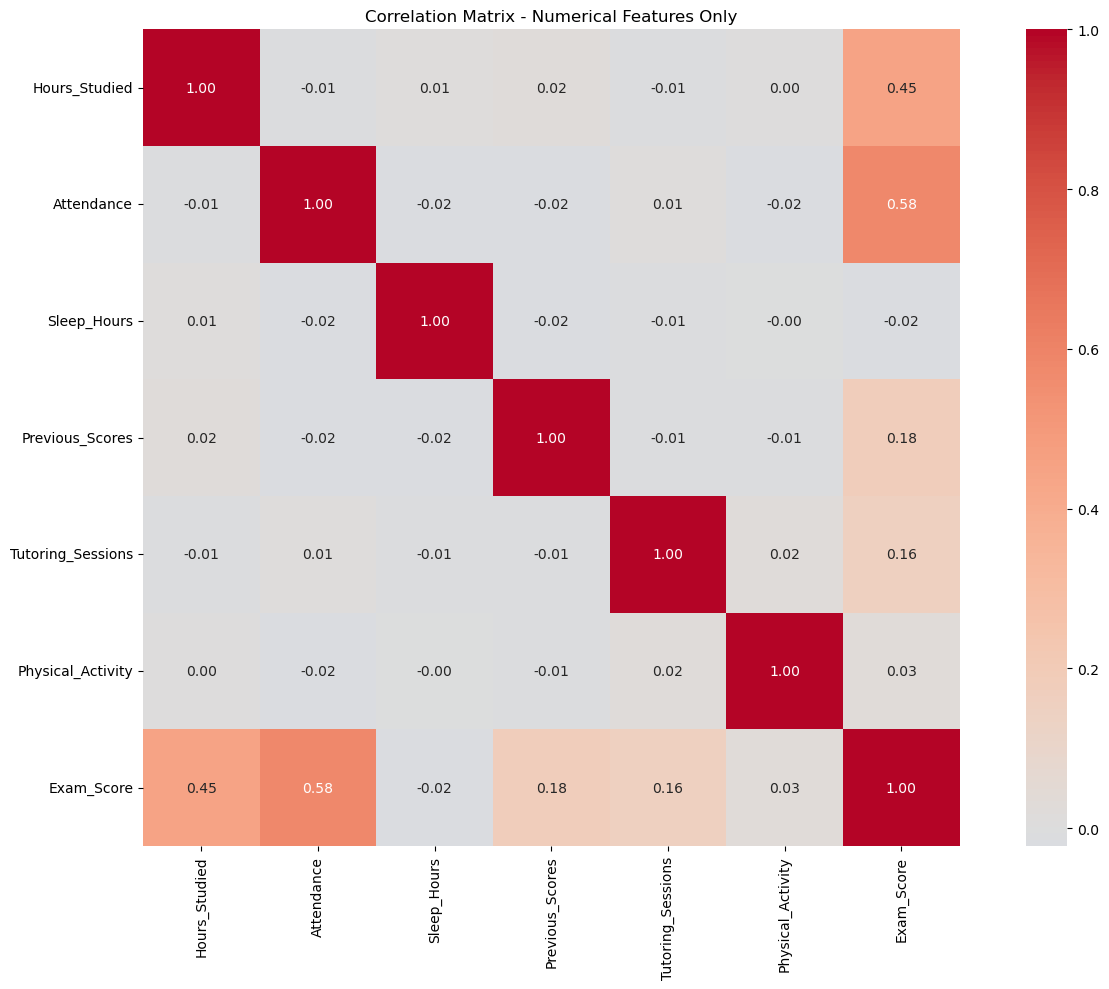

In [72]:
# Correlation heatmap for numerical features only
plt.figure(figsize=(14, 10))

# Get all numerical columns
all_numerical_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
print("All numerical columns found:", all_numerical_cols)
    
# Create correlation matrix for numerical features only
correlation_matrix_numeric = df_analysis[all_numerical_cols].corr()

sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix - Numerical Features Only')
plt.tight_layout()
plt.show()

In [78]:
# it appears that there are some features with very low correlation with the target
# we can drop them to reduce the complexity of the model

# correlations with target
exam_correlations = correlation_matrix_numeric['Exam_Score'].abs().sort_values(ascending=True)
print(exam_correlations.head(len(all_numerical_cols)))

Sleep_Hours          0.017022
Physical_Activity    0.027824
Tutoring_Sessions    0.156525
Previous_Scores      0.175079
Hours_Studied        0.445455
Attendance           0.581072
Exam_Score           1.000000
Name: Exam_Score, dtype: float64


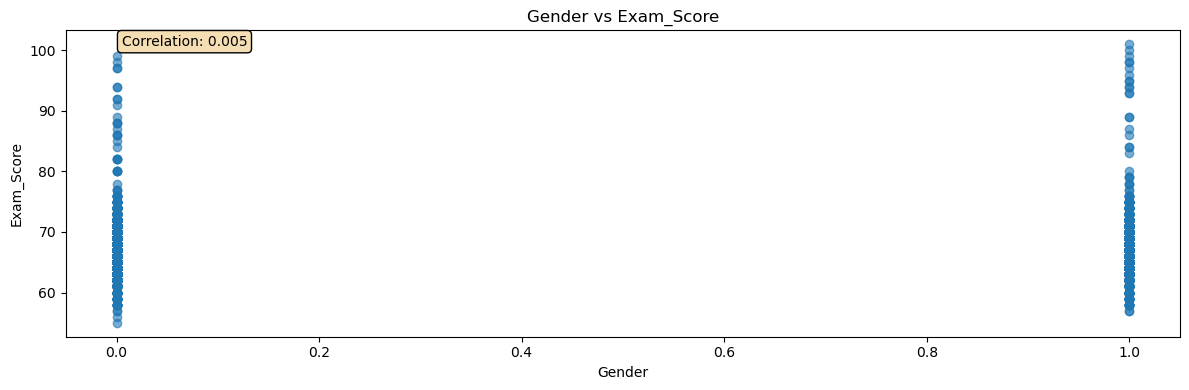

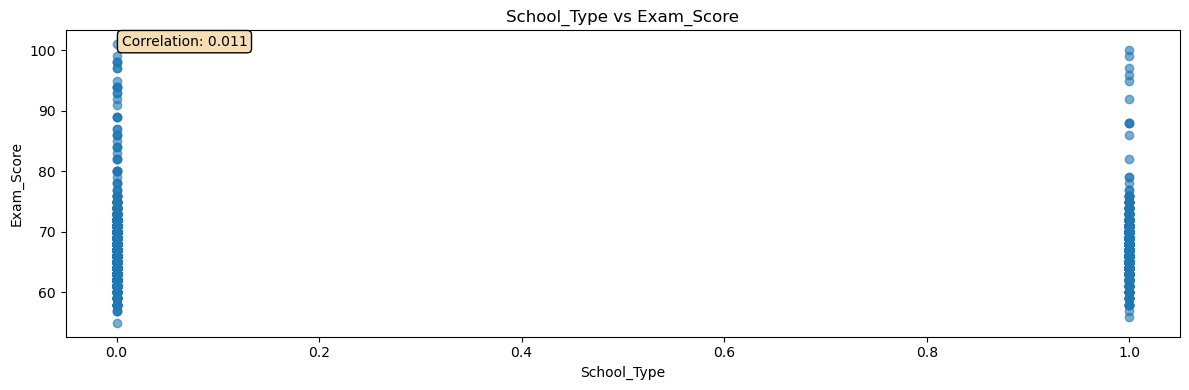

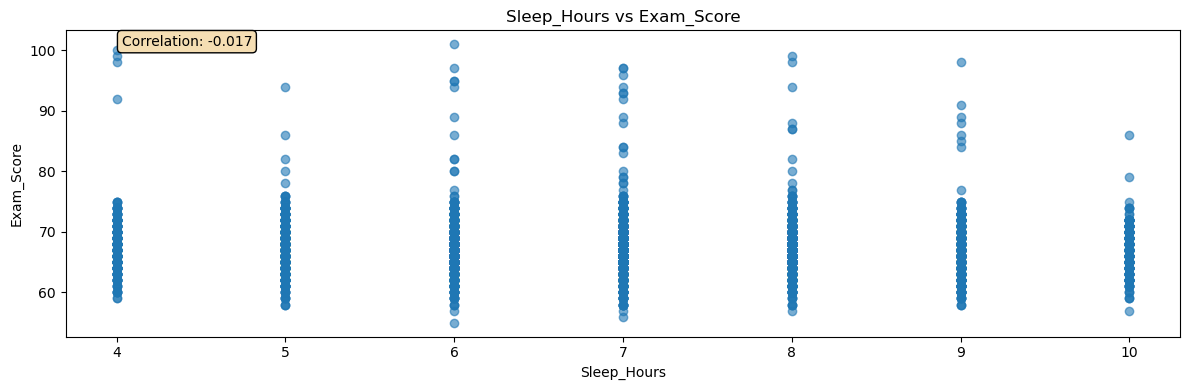

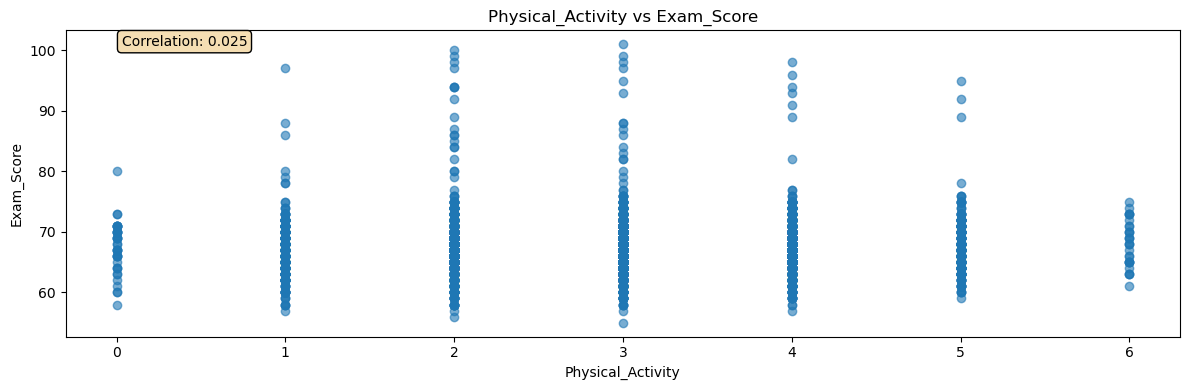

In [55]:
# we can make more plots to visualize the correlations for 
# (Gender                        0.004932
#  School_Type                   0.010868
#  Sleep_Hours                   0.017171
#  Physical_Activity             0.025148)

plot_two_columns(df_analysis, "Gender", "Exam_Score", plot_type="auto", figsize=(12, 4), title=None)
plot_two_columns(df_analysis, "School_Type", "Exam_Score", plot_type="auto", figsize=(12, 4), title=None)
plot_two_columns(df_analysis, "Sleep_Hours", "Exam_Score", plot_type="auto", figsize=(12, 4), title=None)
plot_two_columns(df_analysis, "Physical_Activity", "Exam_Score", plot_type="auto", figsize=(12, 4), title=None)


In [56]:
# lets see if dropping these cols will help the model using the standardized data
df_dropped_cols = df_combined_standard.copy()
cols_to_drop = ["Gender", "School_Type"]
df_dropped_cols.drop(columns=cols_to_drop, inplace=True)

feature_cols = [col for col in df_dropped_cols.columns if col != 'Exam_Score']
# evaluate the model with the dropped cols
train_and_evaluate_model(df_dropped_cols[feature_cols], df_dropped_cols['Exam_Score'])



Linear Results:
R² Score: 0.8124
RMSE: 1.5737
MAE: 0.4397

Ridge Results:
R² Score: 0.8124
RMSE: 1.5737
MAE: 0.4397

Random Forest Results:
R² Score: 0.7004
RMSE: 1.9885
MAE: 1.1069

XGBoost Results:
R² Score: 0.6710
RMSE: 2.0840
MAE: 1.0360

🏆 Best Model: Ridge (R² = 0.8124)


# 2.2.1 Target distribution -> do we have unbalnced data?

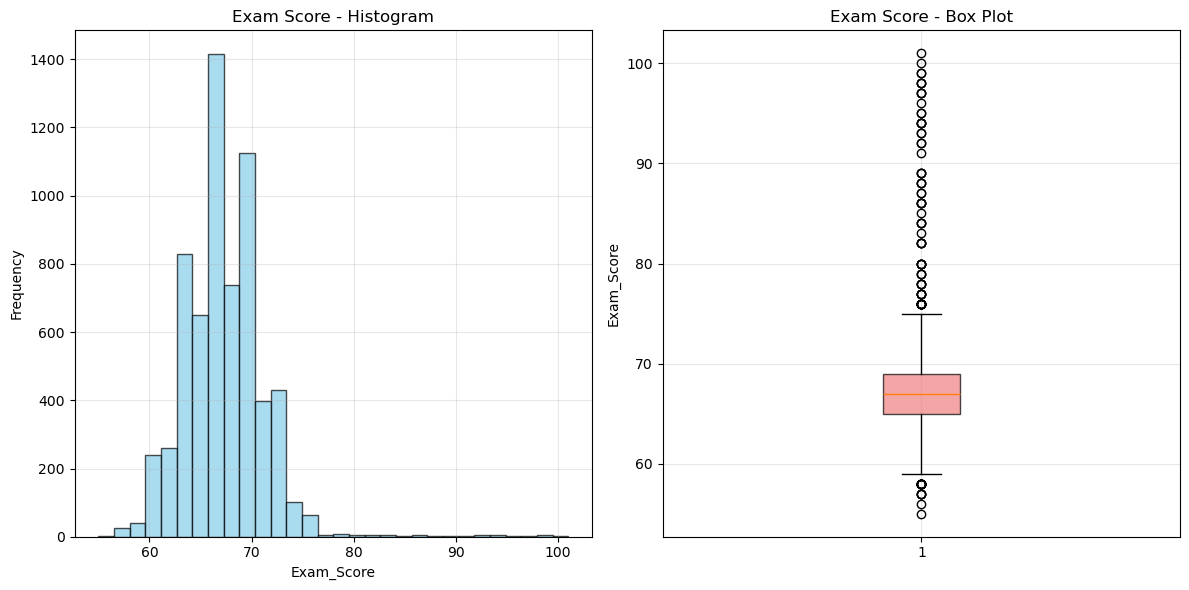


📊 Summary for Exam_Score:
Count: 6378
Mean: 67.25
Median: 67.00
Std: 3.91
Min: 55
Max: 101
Range: 46.00
Potential outliers: 103 (1.6%)


In [57]:
# Plot feature distributions
# for col in df_analysis.columns:
#     if col != 'Exam_Score':
#         plot_feature_distribution(df_analysis, col, title=col, figsize=(12, 6))

# plot target distribution
plot_feature_distribution(df_analysis, 'Exam_Score', title='Exam Score', figsize=(12, 6))

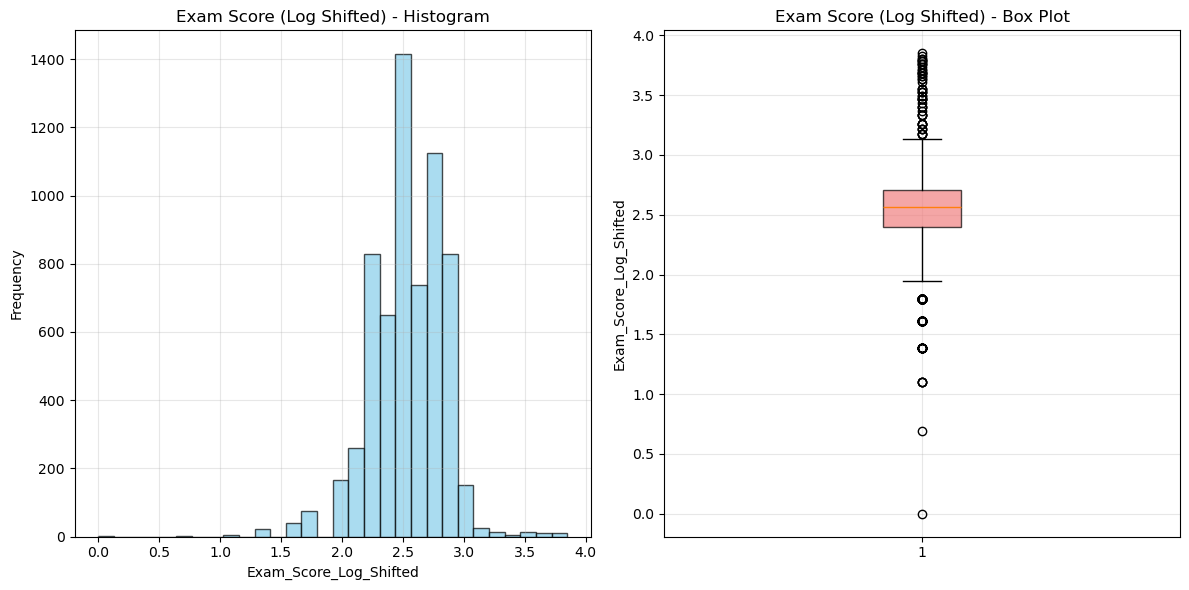


📊 Summary for Exam_Score_Log_Shifted:
Count: 6378
Mean: 2.54
Median: 2.56
Std: 0.30
Min: 0.0
Max: 3.8501476017100584
Range: 3.85
Potential outliers: 196 (3.1%)


In [ ]:
#trying different transformations to reduce skewness (Log transformations)

df_test_log = df_analysis.copy()
# df_test_log['Exam_Score_Log'] = np.log(df_test_log['Exam_Score'])

min_score = df_test_log['Exam_Score'].min()
df_test_log['Exam_Score_Log_Shifted'] = np.log(df_test_log['Exam_Score'] - min_score + 1)

# plot_feature_distribution(df_test_log, 'Exam_Score_Log', title='Exam Score (Log)', figsize=(12, 6))
plot_feature_distribution(df_test_log, 'Exam_Score_Log_Shifted', title='Exam Score (Log Shifted)', figsize=(12, 6))

TARGET COL TRANSFORMATION ANALYSIS
Train set size: 5102
Test set size: 1276
Target column: Exam_Score

Original skewness (TRAIN): 1.693
Square Root skewness (TRAIN): 1.335
Log skewness (TRAIN): -0.900

🎯 BEST TRANSFORMATION: Log (skewness: -0.900)


/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:454: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


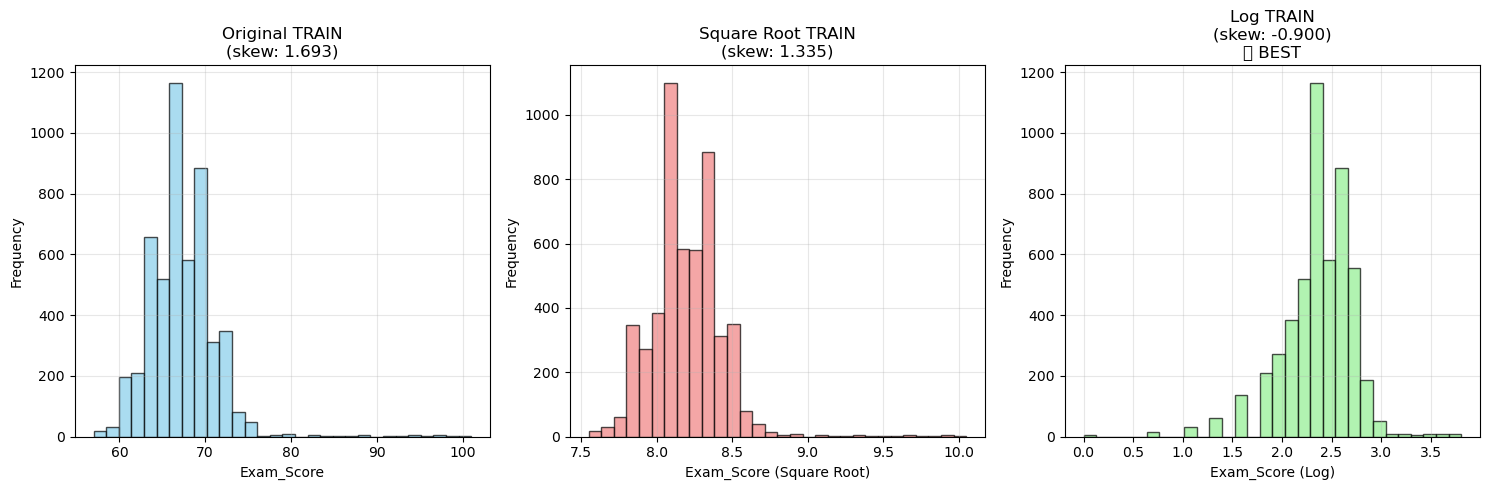

In [58]:
explore_target_transformations(df_analysis, 'Exam_Score',show_results=False)

# 2.2.2 Trying the transformations to see if we get better results

In [59]:
# Apply the transformation and evaluate the model
# do this on the standardized data adn the dropped cols df-> df_dropped_cols
transform_config = {
    'method': 'Square Root',
}
print("\n--Results after Square Root transformation:--")
results = train_and_evaluate_model(
    df_dropped_cols[feature_cols], df_dropped_cols['Exam_Score'], 
    model_type="compare",
    apply_target_transform=transform_config,
)


transform_config = {
    'method': 'Log',
}
print("\n--Results after Log transformation:--")
results = train_and_evaluate_model(
    df_dropped_cols[feature_cols], df_dropped_cols['Exam_Score'], 
    model_type="compare",
    apply_target_transform=transform_config,
)

# from the results we can see that it depended on the model


--Results after Square Root transformation:--
Applied Square Root transformation to target

Linear Results:
R² Score: 0.8128
RMSE: 1.5717
MAE: 0.4340

Ridge Results:
R² Score: 0.8128
RMSE: 1.5717
MAE: 0.4340

Random Forest Results:
R² Score: 0.7027
RMSE: 1.9811
MAE: 1.1030

XGBoost Results:
R² Score: 0.7103
RMSE: 1.9553
MAE: 0.9433

🏆 Best Model: Ridge (R² = 0.8128)
📝 Metrics calculated on original scale after inverse transformation

--Results after Log transformation:--
Applied Log transformation to target

Linear Results:
R² Score: 0.7748
RMSE: 1.7239
MAE: 0.6385

Ridge Results:
R² Score: 0.7749
RMSE: 1.7236
MAE: 0.6383

Random Forest Results:
R² Score: 0.7377
RMSE: 1.8608
MAE: 0.9886

XGBoost Results:
R² Score: 0.7564
RMSE: 1.7930
MAE: 0.8370

🏆 Best Model: Ridge (R² = 0.7749)
📝 Metrics calculated on original scale after inverse transformation


# 3 Model Building

In [60]:
# we have achieved good results with the Ridge model:
# R² Score: 0.8128
# RMSE: 1.5717
# MAE: 0.4340
# it also should be noted that we didn't try any hyperparameter tuning yet -> so this is not the best outcome we can get

# Now lets see if we can build a better model (polynomial regression)
# we will try with transformations and without transformations
# i will also add grid search to find the best hyperparameters

df_final = df_dropped_cols.copy()
feature_cols = [col for col in df_final.columns if col != 'Exam_Score']

In [63]:
# Without grid search (faster)
results = train_polynomial_regression(df_final[feature_cols], df_final['Exam_Score'], grid_search=False)

🔄 Training Polynomial Regression Model
📝 Using default parameters (degree=2, alpha=1.0)

📊 Test Set Performance
R² Score: 0.7971
RMSE: 1.6364
MAE: 0.5578


In [64]:
# Basic usage with grid search
results = train_polynomial_regression(df_final[feature_cols], df_final['Exam_Score'], grid_search=True)

🔄 Training Polynomial Regression Model
🔍 Performing Grid Search with 5-fold CV...
Parameter combinations to test: 16
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best CV R² Score: 0.7025
✅ Best Parameters: {'poly__degree': 1, 'ridge__alpha': 10.0}

📊 Test Set Performance
R² Score: 0.8124
RMSE: 1.5735
MAE: 0.4397


In [65]:
# With Log target transformation and grid search
transform_config = {'method': 'Log', 'params': {}}
results = train_polynomial_regression(df_final[feature_cols], df_final['Exam_Score'], apply_target_transform=transform_config, grid_search=True)

🔄 Training Polynomial Regression Model
✅ Applied Log transformation to target
🔍 Performing Grid Search with 5-fold CV...
Parameter combinations to test: 16
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best CV R² Score: 0.8654
✅ Best Parameters: {'poly__degree': 2, 'ridge__alpha': 10.0}

📊 Test Set Performance
R² Score (Original Scale): 0.8024
RMSE (Original Scale): 1.6150
MAE (Original Scale): 0.4964
📝 Metrics calculated after inverse transformation


In [66]:
# With Square Root target transformation and grid search
transform_config = {'method': 'Square Root', 'params': {}}
results = train_polynomial_regression(df_final[feature_cols], df_final['Exam_Score'], apply_target_transform=transform_config, grid_search=True)

🔄 Training Polynomial Regression Model
✅ Applied Square Root transformation to target
🔍 Performing Grid Search with 5-fold CV...
Parameter combinations to test: 16
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best CV R² Score: 0.7335
✅ Best Parameters: {'poly__degree': 1, 'ridge__alpha': 10.0}

📊 Test Set Performance
R² Score (Original Scale): 0.8129
RMSE (Original Scale): 1.5715
MAE (Original Scale): 0.4338
📝 Metrics calculated after inverse transformation


# DRAFT